In [1]:
import pandas as pd
import numpy as np

In [2]:
nb15_path = 'C:/Users/katsa/Documents/nb15_dataset.csv'

In [4]:
full_nb15_dataset = pd.read_csv(nb15_path)
nb_selected_df = pd.DataFrame()

C:\Users\katsa\AppData\Local\Temp\ipykernel_9840\214131879.py:1: DtypeWarning: Columns (2,4,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  full_nb15_dataset = pd.read_csv(nb15_path)


In [4]:
nb_selected_df['dsport'] = full_nb15_dataset['dsport']
nb_selected_df['dur'] = full_nb15_dataset['dur'] * 10**3 # dur is probably in milliseconds, while cic's flow duration is in microseconds
nb_selected_df['Spkts'] = full_nb15_dataset['Spkts']
nb_selected_df['Dpkts'] = full_nb15_dataset['Dpkts']
nb_selected_df['sbytes'] = full_nb15_dataset['sbytes']
nb_selected_df['dbytes'] = full_nb15_dataset['dbytes']
nb_selected_df['smeansz'] = full_nb15_dataset['smeansz']
nb_selected_df['dmeansz'] = full_nb15_dataset['dmeansz']
nb_selected_df['flow_bytes/s'] = (full_nb15_dataset['sbytes'] + full_nb15_dataset['dbytes']) / (full_nb15_dataset['dur'] / 10**3) # (sbytes+dbytes)/dur
nb_selected_df['flow_packets/s'] = (full_nb15_dataset['Spkts'] + full_nb15_dataset['Dpkts']) / (full_nb15_dataset['dur']  / 10**3) # (Spkts+Dpkts)/dur
# although the two datasets do seem to share the following two features, there can not be an easy way to compute them in nfstream
# so i'm commenting them out..
#nb_selected_df['Sintpkt'] = full_nb15_dataset['Sintpkt'] 
# same,  the corresponding cic features are most likely 'Fwd IAT Total' and 'Bwd IAT Total'
#nb_selected_df['Dintpkt'] = full_nb15_dataset['Dintpkt'] 
nb_selected_df['fwd_packets/s'] = full_nb15_dataset['Spkts'] / (full_nb15_dataset['dur'] / 10**3) # Spkts/dur
nb_selected_df['bwd_packets/s'] = full_nb15_dataset['Dpkts'] / (full_nb15_dataset['dur'] / 10**3)
nb_selected_df['Label'] = full_nb15_dataset['Label']

In [5]:
nb_selected_df['dsport'] = pd.to_numeric(nb_selected_df['dsport'], errors='coerce')

In [6]:
nb_sample_selected_df = nb_selected_df.sample(frac=0.2, random_state=1)

In [7]:
nb_sample_selected_df.head()

,dsport,dur,Spkts,Dpkts,sbytes,dbytes,smeansz,dmeansz,flow_bytes/s,flow_packets/s,fwd_packets/s,bwd_packets/s,Label
102099,53.0,1.077,2,2,146,178,73,89,3.008357e+08,3.714020e+06,1.857010e+06,1.857010e+06,0
264133,41336.0,524.664,6,8,320,1936,53,242,4.299895e+06,2.668374e+04,1.143589e+04,1.524785e+04,0
2491744,14516.0,192.301,84,86,4862,78556,58,913,4.337887e+08,8.840308e+05,4.368152e+05,4.472156e+05,0
1024972,5190.0,49.336,14,14,1168,2364,83,169,7.159072e+07,5.675369e+05,2.837684e+05,2.837684e+05,0
591639,22.0,20.147,108,114,9504,12298,88,108,1.082146e+09,1.101901e+07,5.360600e+06,5.658411e+06,0


In [8]:
nb_sample_selected_df.reset_index(inplace=True)
nb_sample_selected_df.head()

,index,dsport,dur,Spkts,Dpkts,sbytes,dbytes,smeansz,dmeansz,flow_bytes/s,flow_packets/s,fwd_packets/s,bwd_packets/s,Label
0,102099,53.0,1.077,2,2,146,178,73,89,3.008357e+08,3.714020e+06,1.857010e+06,1.857010e+06,0
1,264133,41336.0,524.664,6,8,320,1936,53,242,4.299895e+06,2.668374e+04,1.143589e+04,1.524785e+04,0
2,2491744,14516.0,192.301,84,86,4862,78556,58,913,4.337887e+08,8.840308e+05,4.368152e+05,4.472156e+05,0
3,1024972,5190.0,49.336,14,14,1168,2364,83,169,7.159072e+07,5.675369e+05,2.837684e+05,2.837684e+05,0
4,591639,22.0,20.147,108,114,9504,12298,88,108,1.082146e+09,1.101901e+07,5.360600e+06,5.658411e+06,0


In [9]:
nb_sample_selected_df.drop('index', axis=1)

,dsport,dur,Spkts,Dpkts,sbytes,dbytes,smeansz,dmeansz,flow_bytes/s,flow_packets/s,fwd_packets/s,bwd_packets/s,Label
0,53.0,1.077,2,2,146,178,73,89,3.008357e+08,3.714020e+06,1.857010e+06,1.857010e+06,0
1,41336.0,524.664,6,8,320,1936,53,242,4.299895e+06,2.668374e+04,1.143589e+04,1.524785e+04,0
2,14516.0,192.301,84,86,4862,78556,58,913,4.337887e+08,8.840308e+05,4.368152e+05,4.472156e+05,0
3,5190.0,49.336,14,14,1168,2364,83,169,7.159072e+07,5.675369e+05,2.837684e+05,2.837684e+05,0
4,22.0,20.147,108,114,9504,12298,88,108,1.082146e+09,1.101901e+07,5.360600e+06,5.658411e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508004,53.0,0.005,2,0,114,0,57,0,2.280000e+10,4.000000e+08,4.000000e+08,0.000000e+00,1
508005,53.0,0.010,2,0,264,0,132,0,2.640000e+10,2.000000e+08,2.000000e+08,0.000000e+00,0
508006,26646.0,20.601,48,50,2974,33882,62,678,1.789039e+09,4.757051e+06,2.329984e+06,2.427067e+06,0
508007,80.0,1104.308,14,18,1684,10168,120,565,1.073251e+07,2.897742e+04,1.267762e+04,1.629980e+04,0


BENIGN    443739
ATTACK     64270
Name: Label, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


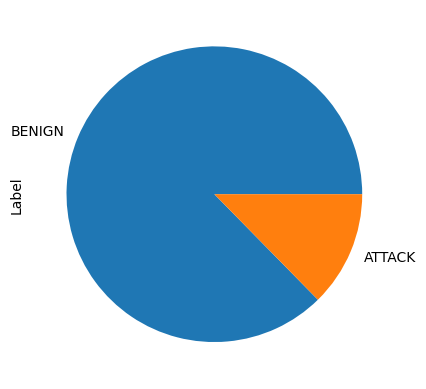

In [11]:
# change label from 0 -> BENIGN
#                   1 -> ATTACK
nb_sample_selected_df['Label'].replace(0, 'BENIGN', inplace=True)
nb_sample_selected_df['Label'].replace(1, 'ATTACK', inplace=True)

labels = nb_sample_selected_df['Label']
print(labels.value_counts())
print(labels.value_counts().plot.pie())

In [12]:
nb_sample_selected_df.to_csv('nb_sample_selected.csv', index=False)

In [95]:
# make sample with all features

nb_sample = full_nb15_dataset.sample(frac=0.2, random_state=1)

In [96]:
# get the count of unique values in column A, along with their data types
value_counts = nb_sample['Label'].apply(lambda x: (x, type(x))).value_counts()

# print the result
print(value_counts)

(0, <class 'int'>)    443739
(1, <class 'int'>)     64270
Name: Label, dtype: int64


In [97]:
print(nb_sample.dtypes)

Unnamed: 0            int64
srcip                object
sport                object
dstip                object
dsport               object
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              

In [98]:
nb_sample.head()

,Unnamed: 0,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
102099,102099,59.166.0.4,5630,149.171.126.6,53,udp,CON,0.001077,146,178,...,0,1,6,1,1,1,1,1,NaN,0
264133,264133,59.166.0.8,35588,149.171.126.0,41336,tcp,FIN,0.524664,320,1936,...,0,5,4,6,4,1,1,2,NaN,0
2491744,391741,59.166.0.4,14959,149.171.126.1,14516,tcp,FIN,0.192301,4862,78556,...,,4,2,1,2,1,1,1,NaN,0
1024972,324971,59.166.0.4,1762,149.171.126.3,5190,tcp,FIN,0.049336,1168,2364,...,0,6,2,2,1,1,1,1,NaN,0
591639,591639,59.166.0.1,2569,149.171.126.2,22,tcp,FIN,0.020147,9504,12298,...,0,1,1,3,1,1,1,1,NaN,0


In [99]:
nb_sample = nb_sample.drop("Unnamed: 0", axis=1)
nb_sample.reset_index(inplace=True)
nb_sample.head()

,index,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,102099,59.166.0.4,5630,149.171.126.6,53,udp,CON,0.001077,146,178,...,0,1,6,1,1,1,1,1,NaN,0
1,264133,59.166.0.8,35588,149.171.126.0,41336,tcp,FIN,0.524664,320,1936,...,0,5,4,6,4,1,1,2,NaN,0
2,2491744,59.166.0.4,14959,149.171.126.1,14516,tcp,FIN,0.192301,4862,78556,...,,4,2,1,2,1,1,1,NaN,0
3,1024972,59.166.0.4,1762,149.171.126.3,5190,tcp,FIN,0.049336,1168,2364,...,0,6,2,2,1,1,1,1,NaN,0
4,591639,59.166.0.1,2569,149.171.126.2,22,tcp,FIN,0.020147,9504,12298,...,0,1,1,3,1,1,1,1,NaN,0


In [100]:
nb_sample = nb_sample.drop('index', axis=1)
nb_sample.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.4,5630,149.171.126.6,53,udp,CON,0.001077,146,178,31,...,0,1,6,1,1,1,1,1,NaN,0
1,59.166.0.8,35588,149.171.126.0,41336,tcp,FIN,0.524664,320,1936,31,...,0,5,4,6,4,1,1,2,NaN,0
2,59.166.0.4,14959,149.171.126.1,14516,tcp,FIN,0.192301,4862,78556,31,...,,4,2,1,2,1,1,1,NaN,0
3,59.166.0.4,1762,149.171.126.3,5190,tcp,FIN,0.049336,1168,2364,31,...,0,6,2,2,1,1,1,1,NaN,0
4,59.166.0.1,2569,149.171.126.2,22,tcp,FIN,0.020147,9504,12298,31,...,0,1,1,3,1,1,1,1,NaN,0


In [101]:
nb_sample['Label'].replace(0, 'BENIGN', inplace=True)
nb_sample['Label'].replace(1, 'ATTACK', inplace=True)

In [102]:
nb_sample = nb_sample.drop('attack_cat', axis=1)
nb_sample = nb_sample.drop('srcip', axis=1)
nb_sample = nb_sample.drop('dstip', axis=1)
nb_sample['dsport'] = pd.to_numeric(nb_sample['dsport'], errors='coerce')
nb_sample['sport'] = pd.to_numeric(nb_sample['sport'], errors='coerce')
nb_sample.head()

,sport,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,5630.0,53.0,udp,CON,0.001077,146,178,31,29,0,...,0.0,0,1,6,1,1,1,1,1,BENIGN
1,35588.0,41336.0,tcp,FIN,0.524664,320,1936,31,29,1,...,0.0,0,5,4,6,4,1,1,2,BENIGN
2,14959.0,14516.0,tcp,FIN,0.192301,4862,78556,31,29,7,...,NaN,,4,2,1,2,1,1,1,BENIGN
3,1762.0,5190.0,tcp,FIN,0.049336,1168,2364,31,29,4,...,0.0,0,6,2,2,1,1,1,1,BENIGN
4,2569.0,22.0,tcp,FIN,0.020147,9504,12298,31,29,26,...,0.0,0,1,1,3,1,1,1,1,BENIGN


In [103]:
# get the count of unique values in column A, along with their data types
value_counts = nb_sample['Label'].apply(lambda x: (x, type(x))).value_counts()

# print the result
print(value_counts)

(BENIGN, <class 'str'>)    443739
(ATTACK, <class 'str'>)     64270
Name: Label, dtype: int64


In [104]:
nb_sample.dropna(subset=['proto', 'state', 'service', 'Label'], inplace=True)
nb_sample.head()

,sport,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,5630.0,53.0,udp,CON,0.001077,146,178,31,29,0,...,0.0,0,1,6,1,1,1,1,1,BENIGN
1,35588.0,41336.0,tcp,FIN,0.524664,320,1936,31,29,1,...,0.0,0,5,4,6,4,1,1,2,BENIGN
2,14959.0,14516.0,tcp,FIN,0.192301,4862,78556,31,29,7,...,NaN,,4,2,1,2,1,1,1,BENIGN
3,1762.0,5190.0,tcp,FIN,0.049336,1168,2364,31,29,4,...,0.0,0,6,2,2,1,1,1,1,BENIGN
4,2569.0,22.0,tcp,FIN,0.020147,9504,12298,31,29,26,...,0.0,0,1,1,3,1,1,1,1,BENIGN


In [105]:
# get the count of unique values in column A, along with their data types
value_counts = nb_sample['Label'].apply(lambda x: (x, type(x))).value_counts()

# print the result
print(value_counts)

(BENIGN, <class 'str'>)    443739
(ATTACK, <class 'str'>)     64270
Name: Label, dtype: int64


In [106]:
print(nb_sample.dtypes)

sport               float64
dsport              float64
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports       int64
ct_state_ttl          int64
ct_flw_http_mthd    

In [107]:
print(nb_sample['service'].unique())

['dns' 'ftp-data' '-' 'ssh' 'http' 'ftp' 'smtp' 'pop3' 'dhcp' 'radius'
 'snmp' 'ssl' 'irc']


In [108]:
print(nb_sample['ct_ftp_cmd'].unique())
# i don't know how to replace ' ' so i'm going to get rid of the whole column since ' ' is very large...

[0 ' ' '1' 1 4 '0' 3 '4' 2 6 5 '2' 8]


     286226
0    211976
1      4558
1      3383
0      1167
2       241
3       152
4       144
6        67
5        60
4        28
2         4
8         3
Name: ct_ftp_cmd, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


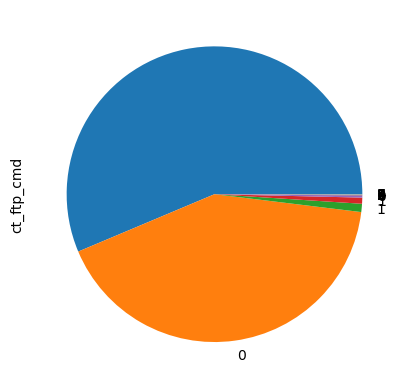

In [109]:
print(nb_sample['ct_ftp_cmd'].value_counts())
print(nb_sample['ct_ftp_cmd'].value_counts().plot.pie())

     286226
0    213143
1      7941
2       241
3       152
4       144
6        67
5        60
4        28
2         4
8         3
Name: ct_ftp_cmd, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


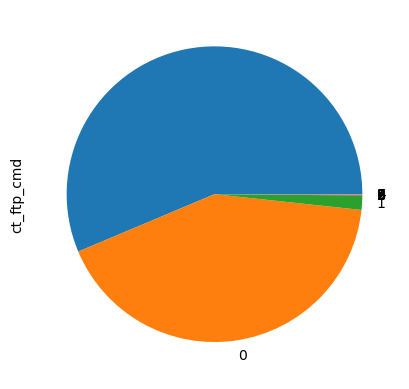

In [110]:
nb_sample['ct_ftp_cmd'].replace('0', 0, inplace=True)
nb_sample['ct_ftp_cmd'].replace('1', 1, inplace=True)
print(nb_sample['ct_ftp_cmd'].value_counts())
print(nb_sample['ct_ftp_cmd'].value_counts().plot.pie())
nb_sample.drop('ct_ftp_cmd', axis=1, inplace=True)

-           249227
dns         156364
http         41207
ftp-data     25512
smtp         16258
ftp           9726
ssh           9323
pop3           303
dhcp            27
snmp            24
ssl             24
radius           8
irc              6
Name: service, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


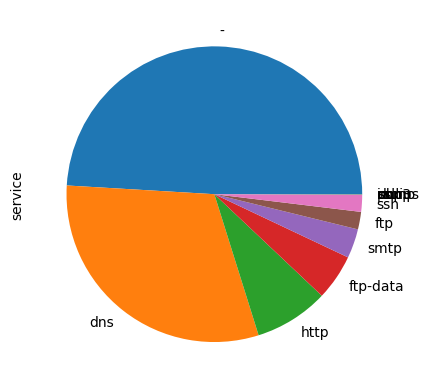

In [111]:
print(nb_sample['service'].value_counts())
print(nb_sample['service'].value_counts().plot.pie())

In [112]:
# get the count of unique values in column A, along with their data types
value_counts = nb_sample['service'].apply(lambda x: (x, type(x))).value_counts()

# print the result
print(value_counts)

(-, <class 'str'>)           249227
(dns, <class 'str'>)         156364
(http, <class 'str'>)         41207
(ftp-data, <class 'str'>)     25512
(smtp, <class 'str'>)         16258
(ftp, <class 'str'>)           9726
(ssh, <class 'str'>)           9323
(pop3, <class 'str'>)           303
(dhcp, <class 'str'>)            27
(snmp, <class 'str'>)            24
(ssl, <class 'str'>)             24
(radius, <class 'str'>)           8
(irc, <class 'str'>)              6
Name: service, dtype: int64


In [113]:
print(nb_sample.dtypes)

sport               float64
dsport              float64
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports       int64
ct_state_ttl          int64
ct_flw_http_mthd    

In [114]:
# get the count of unique values in column A, along with their data types
value_counts = nb_sample['proto'].apply(lambda x: (x, type(x))).value_counts()

# print the result
print(value_counts)

(tcp, <class 'str'>)       298670
(udp, <class 'str'>)       198400
(unas, <class 'str'>)        3213
(arp, <class 'str'>)         1984
(ospf, <class 'str'>)        1579
                            ...  
(pipe, <class 'str'>)          17
(i-nlsp, <class 'str'>)        17
(isis, <class 'str'>)          16
(rtp, <class 'str'>)            2
(udt, <class 'str'>)            1
Name: proto, Length: 134, dtype: int64


In [115]:
# get the count of unique values in column A, along with their data types
value_counts = nb_sample['state'].apply(lambda x: (x, type(x))).value_counts()

# print the result
print(value_counts)

(FIN, <class 'str'>)    295477
(CON, <class 'str'>)    112144
(INT, <class 'str'>)     98284
(REQ, <class 'str'>)      1836
(RST, <class 'str'>)       113
(ECO, <class 'str'>)        74
(CLO, <class 'str'>)        37
(URH, <class 'str'>)        23
(ACC, <class 'str'>)         9
(no, <class 'str'>)          3
(PAR, <class 'str'>)         3
(ECR, <class 'str'>)         3
(TST, <class 'str'>)         2
(TXD, <class 'str'>)         1
Name: state, dtype: int64


In [116]:
nb_sample.to_csv('nb_sample_almost_all_feat.csv', index=False)

In [117]:
# get the count of unique values in column A, along with their data types
value_counts = nb_sample['Label'].apply(lambda x: (x, type(x))).value_counts()

# print the result
print(value_counts)

(BENIGN, <class 'str'>)    443739
(ATTACK, <class 'str'>)     64270
Name: Label, dtype: int64
